# Demo of VAE for anomaly detection of diverse sensor data
Trained on non-valve fault data to learn a normal expectation.

Build the model for 512 time points per cycle.

In [1]:
%matplotlib inline

In [8]:
from demo import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
model = VAE1D(512, 14, 1000)
model.to(device)

VAE1D(
  (encoder): Sequential(
    (input-conv): Conv1d(14, 16, kernel_size=(4,), stride=(2,), padding=(1,))
    (input-relu): ReLU(inplace)
    (pyramid_16-32_conv): Conv1d(16, 32, kernel_size=(4,), stride=(2,), padding=(1,))
    (pyramid_32_batchnorm): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_32_relu): ReLU(inplace)
    (pyramid_32-64_conv): Conv1d(32, 64, kernel_size=(4,), stride=(2,), padding=(1,))
    (pyramid_64_batchnorm): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_64_relu): ReLU(inplace)
    (pyramid_64-128_conv): Conv1d(64, 128, kernel_size=(4,), stride=(2,), padding=(1,))
    (pyramid_128_batchnorm): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid_128_relu): ReLU(inplace)
    (pyramid_128-256_conv): Conv1d(128, 256, kernel_size=(4,), stride=(2,), padding=(1,))
    (pyramid_256_batchnorm): BatchNorm1d(256, eps=1e-05, momentum=0.1,

Load the best parameters from training.

In [6]:
model = load_checkpoint(model, device)

Checkpoint Performance:
Validation loss: 0.441
Epoch: 61


Next we need to load the datasets of sensors readings.

In [7]:
data_path = Path('data/hydraulic')
train_dl, val_dl, test_dl = load_datasets(data_path)

Let's get some random images from the dataset for examples and generate new versions.

In [10]:
data, targets = get_random_samples(test_dl)

In [11]:
list_target_classes(test_dl)

0 = fail
1 = norm


In [12]:
targets

tensor([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [14]:
model.eval()
with torch.no_grad():
    # Generate
    data = data.to(device)
    gen_data, mu, logvar = model(data)

In [15]:
gen_data.shape

torch.Size([20, 14, 512])

In [36]:
sample = data[1, :, :].cpu().numpy()
sample

array([[0.20700543, 0.21094273, 0.21592006, ..., 0.20280811, 0.20438674,
        0.20495573],
       [0.2336784 , 0.02168075, 0.00190439, ..., 0.3607598 , 0.36520338,
        0.3634943 ],
       [0.24985199, 0.2599171 , 0.2705743 , ..., 0.25281233, 0.25340438,
        0.24689165],
       ...,
       [0.830373  , 0.830373  , 0.830373  , ..., 0.8331308 , 0.8331308 ,
        0.8331308 ],
       [0.8398859 , 0.83954585, 0.8392058 , ..., 0.8378236 , 0.8378236 ,
        0.8378236 ],
       [0.13911779, 0.14063257, 0.14214736, ..., 0.13863306, 0.13863306,
        0.13863306]], dtype=float32)

In [37]:
gen_sample = gen_data[1, :, :].cpu().numpy()
sample

array([[0.20700543, 0.21094273, 0.21592006, ..., 0.20280811, 0.20438674,
        0.20495573],
       [0.2336784 , 0.02168075, 0.00190439, ..., 0.3607598 , 0.36520338,
        0.3634943 ],
       [0.24985199, 0.2599171 , 0.2705743 , ..., 0.25281233, 0.25340438,
        0.24689165],
       ...,
       [0.830373  , 0.830373  , 0.830373  , ..., 0.8331308 , 0.8331308 ,
        0.8331308 ],
       [0.8398859 , 0.83954585, 0.8392058 , ..., 0.8378236 , 0.8378236 ,
        0.8378236 ],
       [0.13911779, 0.14063257, 0.14214736, ..., 0.13863306, 0.13863306,
        0.13863306]], dtype=float32)

Show the data plots.

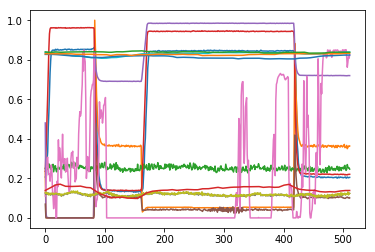

In [38]:
show_plot(sample)

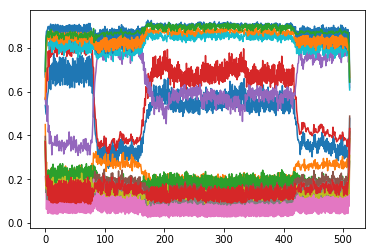

In [39]:
show_plot(gen_sample)

Let's score the success of the recreation and look for outliers.

In [31]:
%run -i outlier_detection.py

NameError: name 'VAE2DLoss' is not defined

<Figure size 432x288 with 0 Axes>